# Importing libraries

In [1]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from global_land_mask import is_land
from scipy.io import netcdf

In [2]:
DATA_FILE_DIR = './data_1.0/'

START_YEAR, END_YEAR = 2011, 2020

NUM_OF_YEARS = END_YEAR - START_YEAR

NUM_OF_MONTHS = 12

NUM_OF_DAYS = {1: 31, 2: 28, 3: 31, 4: 30, 5: 31, 6: 30, 7: 31, 8: 31, 9: 30, 10: 31, 11: 30, 12: 31,}

LAT = 181

LON = 360

A function that opens netCDF file and read temperature variable and get the minimum temperature

In [5]:
def get_min_tmp(filename):
    print(filename)
    file = netcdf.netcdf_file(filename, mmap=False)
    tmp = file.variables['T_MIN_L103_Pd'].data.copy()
    min_tmp = np.ndarray(tmp.shape[1:])

    for i in range(tmp.shape[1]):
        for j in range(tmp.shape[2]):
            min_tmp[i, j] = min(tmp[0, i, j], tmp[1, i, j], tmp[2, i, j], tmp[3, i, j])
    
    file.close()
    return min_tmp

Read 9 years of temperature data and take the average/minimum  
e.g. date '0417' min_tmp = 20110417_min_tmp + 20130417_min_tmp + ... + 2019_min_tmp

In [6]:
yearly_date_avg = {}
yearly_date_min = {}
for month in range(1, NUM_OF_MONTHS+1, 1):
    for day in range(1, NUM_OF_DAYS[month]+1, 1):
        date_tmps = np.zeros((NUM_OF_YEARS, LAT, LON))
        
        if month < 4: # if month<4, data is from 2012 to 2020
            for year in range(START_YEAR+1, END_YEAR+1):
                filename = DATA_FILE_DIR + '{}{:02d}{:02d}.nc'.format(year, month, day)
                assert os.path.isfile(filename), "File Not Found: '{}'".format(filename)
                date_tmps[year-START_YEAR-1] = get_min_tmp(filename)
        else: # if month>=4, data are from 2011 to 2019
            for year in range(START_YEAR, END_YEAR):
                filename = DATA_FILE_DIR + '{}{:02d}{:02d}.nc'.format(year, month, day)
                assert os.path.isfile(filename), "File Not Found: '{}'".format(filename)
                date_tmps[year-START_YEAR] = get_min_tmp(filename)
        
        yearly_date_avg['{:02d}{:02d}'.format(month, day)] = date_tmps.mean(axis=0)
        yearly_date_min['{:02d}{:02d}'.format(month, day)] = date_tmps.min(axis=0)

./data_1.0/20120101.nc
./data_1.0/20130101.nc
./data_1.0/20140101.nc
./data_1.0/20150101.nc
./data_1.0/20160101.nc
./data_1.0/20170101.nc
./data_1.0/20180101.nc
./data_1.0/20190101.nc
./data_1.0/20200101.nc
./data_1.0/20120102.nc
./data_1.0/20130102.nc
./data_1.0/20140102.nc
./data_1.0/20150102.nc
./data_1.0/20160102.nc
./data_1.0/20170102.nc
./data_1.0/20180102.nc
./data_1.0/20190102.nc
./data_1.0/20200102.nc
./data_1.0/20120103.nc
./data_1.0/20130103.nc
./data_1.0/20140103.nc
./data_1.0/20150103.nc
./data_1.0/20160103.nc
./data_1.0/20170103.nc
./data_1.0/20180103.nc
./data_1.0/20190103.nc
./data_1.0/20200103.nc
./data_1.0/20120104.nc
./data_1.0/20130104.nc
./data_1.0/20140104.nc
./data_1.0/20150104.nc
./data_1.0/20160104.nc
./data_1.0/20170104.nc
./data_1.0/20180104.nc
./data_1.0/20190104.nc
./data_1.0/20200104.nc
./data_1.0/20120105.nc
./data_1.0/20130105.nc
./data_1.0/20140105.nc
./data_1.0/20150105.nc
./data_1.0/20160105.nc
./data_1.0/20170105.nc
./data_1.0/20180105.nc
./data_1.0/

./data_1.0/20190209.nc
./data_1.0/20200209.nc
./data_1.0/20120210.nc
./data_1.0/20130210.nc
./data_1.0/20140210.nc
./data_1.0/20150210.nc
./data_1.0/20160210.nc
./data_1.0/20170210.nc
./data_1.0/20180210.nc
./data_1.0/20190210.nc
./data_1.0/20200210.nc
./data_1.0/20120211.nc
./data_1.0/20130211.nc
./data_1.0/20140211.nc
./data_1.0/20150211.nc
./data_1.0/20160211.nc
./data_1.0/20170211.nc
./data_1.0/20180211.nc
./data_1.0/20190211.nc
./data_1.0/20200211.nc
./data_1.0/20120212.nc
./data_1.0/20130212.nc
./data_1.0/20140212.nc
./data_1.0/20150212.nc
./data_1.0/20160212.nc
./data_1.0/20170212.nc
./data_1.0/20180212.nc
./data_1.0/20190212.nc
./data_1.0/20200212.nc
./data_1.0/20120213.nc
./data_1.0/20130213.nc
./data_1.0/20140213.nc
./data_1.0/20150213.nc
./data_1.0/20160213.nc
./data_1.0/20170213.nc
./data_1.0/20180213.nc
./data_1.0/20190213.nc
./data_1.0/20200213.nc
./data_1.0/20120214.nc
./data_1.0/20130214.nc
./data_1.0/20140214.nc
./data_1.0/20150214.nc
./data_1.0/20160214.nc
./data_1.0/

./data_1.0/20170321.nc
./data_1.0/20180321.nc
./data_1.0/20190321.nc
./data_1.0/20200321.nc
./data_1.0/20120322.nc
./data_1.0/20130322.nc
./data_1.0/20140322.nc
./data_1.0/20150322.nc
./data_1.0/20160322.nc
./data_1.0/20170322.nc
./data_1.0/20180322.nc
./data_1.0/20190322.nc
./data_1.0/20200322.nc
./data_1.0/20120323.nc
./data_1.0/20130323.nc
./data_1.0/20140323.nc
./data_1.0/20150323.nc
./data_1.0/20160323.nc
./data_1.0/20170323.nc
./data_1.0/20180323.nc
./data_1.0/20190323.nc
./data_1.0/20200323.nc
./data_1.0/20120324.nc
./data_1.0/20130324.nc
./data_1.0/20140324.nc
./data_1.0/20150324.nc
./data_1.0/20160324.nc
./data_1.0/20170324.nc
./data_1.0/20180324.nc
./data_1.0/20190324.nc
./data_1.0/20200324.nc
./data_1.0/20120325.nc
./data_1.0/20130325.nc
./data_1.0/20140325.nc
./data_1.0/20150325.nc
./data_1.0/20160325.nc
./data_1.0/20170325.nc
./data_1.0/20180325.nc
./data_1.0/20190325.nc
./data_1.0/20200325.nc
./data_1.0/20120326.nc
./data_1.0/20130326.nc
./data_1.0/20140326.nc
./data_1.0/

./data_1.0/20140430.nc
./data_1.0/20150430.nc
./data_1.0/20160430.nc
./data_1.0/20170430.nc
./data_1.0/20180430.nc
./data_1.0/20190430.nc
./data_1.0/20110501.nc
./data_1.0/20120501.nc
./data_1.0/20130501.nc
./data_1.0/20140501.nc
./data_1.0/20150501.nc
./data_1.0/20160501.nc
./data_1.0/20170501.nc
./data_1.0/20180501.nc
./data_1.0/20190501.nc
./data_1.0/20110502.nc
./data_1.0/20120502.nc
./data_1.0/20130502.nc
./data_1.0/20140502.nc
./data_1.0/20150502.nc
./data_1.0/20160502.nc
./data_1.0/20170502.nc
./data_1.0/20180502.nc
./data_1.0/20190502.nc
./data_1.0/20110503.nc
./data_1.0/20120503.nc
./data_1.0/20130503.nc
./data_1.0/20140503.nc
./data_1.0/20150503.nc
./data_1.0/20160503.nc
./data_1.0/20170503.nc
./data_1.0/20180503.nc
./data_1.0/20190503.nc
./data_1.0/20110504.nc
./data_1.0/20120504.nc
./data_1.0/20130504.nc
./data_1.0/20140504.nc
./data_1.0/20150504.nc
./data_1.0/20160504.nc
./data_1.0/20170504.nc
./data_1.0/20180504.nc
./data_1.0/20190504.nc
./data_1.0/20110505.nc
./data_1.0/

./data_1.0/20120609.nc
./data_1.0/20130609.nc
./data_1.0/20140609.nc
./data_1.0/20150609.nc
./data_1.0/20160609.nc
./data_1.0/20170609.nc
./data_1.0/20180609.nc
./data_1.0/20190609.nc
./data_1.0/20110610.nc
./data_1.0/20120610.nc
./data_1.0/20130610.nc
./data_1.0/20140610.nc
./data_1.0/20150610.nc
./data_1.0/20160610.nc
./data_1.0/20170610.nc
./data_1.0/20180610.nc
./data_1.0/20190610.nc
./data_1.0/20110611.nc
./data_1.0/20120611.nc
./data_1.0/20130611.nc
./data_1.0/20140611.nc
./data_1.0/20150611.nc
./data_1.0/20160611.nc
./data_1.0/20170611.nc
./data_1.0/20180611.nc
./data_1.0/20190611.nc
./data_1.0/20110612.nc
./data_1.0/20120612.nc
./data_1.0/20130612.nc
./data_1.0/20140612.nc
./data_1.0/20150612.nc
./data_1.0/20160612.nc
./data_1.0/20170612.nc
./data_1.0/20180612.nc
./data_1.0/20190612.nc
./data_1.0/20110613.nc
./data_1.0/20120613.nc
./data_1.0/20130613.nc
./data_1.0/20140613.nc
./data_1.0/20150613.nc
./data_1.0/20160613.nc
./data_1.0/20170613.nc
./data_1.0/20180613.nc
./data_1.0/

./data_1.0/20190718.nc
./data_1.0/20110719.nc
./data_1.0/20120719.nc
./data_1.0/20130719.nc
./data_1.0/20140719.nc
./data_1.0/20150719.nc
./data_1.0/20160719.nc
./data_1.0/20170719.nc
./data_1.0/20180719.nc
./data_1.0/20190719.nc
./data_1.0/20110720.nc
./data_1.0/20120720.nc
./data_1.0/20130720.nc
./data_1.0/20140720.nc
./data_1.0/20150720.nc
./data_1.0/20160720.nc
./data_1.0/20170720.nc
./data_1.0/20180720.nc
./data_1.0/20190720.nc
./data_1.0/20110721.nc
./data_1.0/20120721.nc
./data_1.0/20130721.nc
./data_1.0/20140721.nc
./data_1.0/20150721.nc
./data_1.0/20160721.nc
./data_1.0/20170721.nc
./data_1.0/20180721.nc
./data_1.0/20190721.nc
./data_1.0/20110722.nc
./data_1.0/20120722.nc
./data_1.0/20130722.nc
./data_1.0/20140722.nc
./data_1.0/20150722.nc
./data_1.0/20160722.nc
./data_1.0/20170722.nc
./data_1.0/20180722.nc
./data_1.0/20190722.nc
./data_1.0/20110723.nc
./data_1.0/20120723.nc
./data_1.0/20130723.nc
./data_1.0/20140723.nc
./data_1.0/20150723.nc
./data_1.0/20160723.nc
./data_1.0/

./data_1.0/20170827.nc
./data_1.0/20180827.nc
./data_1.0/20190827.nc
./data_1.0/20110828.nc
./data_1.0/20120828.nc
./data_1.0/20130828.nc
./data_1.0/20140828.nc
./data_1.0/20150828.nc
./data_1.0/20160828.nc
./data_1.0/20170828.nc
./data_1.0/20180828.nc
./data_1.0/20190828.nc
./data_1.0/20110829.nc
./data_1.0/20120829.nc
./data_1.0/20130829.nc
./data_1.0/20140829.nc
./data_1.0/20150829.nc
./data_1.0/20160829.nc
./data_1.0/20170829.nc
./data_1.0/20180829.nc
./data_1.0/20190829.nc
./data_1.0/20110830.nc
./data_1.0/20120830.nc
./data_1.0/20130830.nc
./data_1.0/20140830.nc
./data_1.0/20150830.nc
./data_1.0/20160830.nc
./data_1.0/20170830.nc
./data_1.0/20180830.nc
./data_1.0/20190830.nc
./data_1.0/20110831.nc
./data_1.0/20120831.nc
./data_1.0/20130831.nc
./data_1.0/20140831.nc
./data_1.0/20150831.nc
./data_1.0/20160831.nc
./data_1.0/20170831.nc
./data_1.0/20180831.nc
./data_1.0/20190831.nc
./data_1.0/20110901.nc
./data_1.0/20120901.nc
./data_1.0/20130901.nc
./data_1.0/20140901.nc
./data_1.0/

./data_1.0/20151006.nc
./data_1.0/20161006.nc
./data_1.0/20171006.nc
./data_1.0/20181006.nc
./data_1.0/20191006.nc
./data_1.0/20111007.nc
./data_1.0/20121007.nc
./data_1.0/20131007.nc
./data_1.0/20141007.nc
./data_1.0/20151007.nc
./data_1.0/20161007.nc
./data_1.0/20171007.nc
./data_1.0/20181007.nc
./data_1.0/20191007.nc
./data_1.0/20111008.nc
./data_1.0/20121008.nc
./data_1.0/20131008.nc
./data_1.0/20141008.nc
./data_1.0/20151008.nc
./data_1.0/20161008.nc
./data_1.0/20171008.nc
./data_1.0/20181008.nc
./data_1.0/20191008.nc
./data_1.0/20111009.nc
./data_1.0/20121009.nc
./data_1.0/20131009.nc
./data_1.0/20141009.nc
./data_1.0/20151009.nc
./data_1.0/20161009.nc
./data_1.0/20171009.nc
./data_1.0/20181009.nc
./data_1.0/20191009.nc
./data_1.0/20111010.nc
./data_1.0/20121010.nc
./data_1.0/20131010.nc
./data_1.0/20141010.nc
./data_1.0/20151010.nc
./data_1.0/20161010.nc
./data_1.0/20171010.nc
./data_1.0/20181010.nc
./data_1.0/20191010.nc
./data_1.0/20111011.nc
./data_1.0/20121011.nc
./data_1.0/

./data_1.0/20131115.nc
./data_1.0/20141115.nc
./data_1.0/20151115.nc
./data_1.0/20161115.nc
./data_1.0/20171115.nc
./data_1.0/20181115.nc
./data_1.0/20191115.nc
./data_1.0/20111116.nc
./data_1.0/20121116.nc
./data_1.0/20131116.nc
./data_1.0/20141116.nc
./data_1.0/20151116.nc
./data_1.0/20161116.nc
./data_1.0/20171116.nc
./data_1.0/20181116.nc
./data_1.0/20191116.nc
./data_1.0/20111117.nc
./data_1.0/20121117.nc
./data_1.0/20131117.nc
./data_1.0/20141117.nc
./data_1.0/20151117.nc
./data_1.0/20161117.nc
./data_1.0/20171117.nc
./data_1.0/20181117.nc
./data_1.0/20191117.nc
./data_1.0/20111118.nc
./data_1.0/20121118.nc
./data_1.0/20131118.nc
./data_1.0/20141118.nc
./data_1.0/20151118.nc
./data_1.0/20161118.nc
./data_1.0/20171118.nc
./data_1.0/20181118.nc
./data_1.0/20191118.nc
./data_1.0/20111119.nc
./data_1.0/20121119.nc
./data_1.0/20131119.nc
./data_1.0/20141119.nc
./data_1.0/20151119.nc
./data_1.0/20161119.nc
./data_1.0/20171119.nc
./data_1.0/20181119.nc
./data_1.0/20191119.nc
./data_1.0/

./data_1.0/20111225.nc
./data_1.0/20121225.nc
./data_1.0/20131225.nc
./data_1.0/20141225.nc
./data_1.0/20151225.nc
./data_1.0/20161225.nc
./data_1.0/20171225.nc
./data_1.0/20181225.nc
./data_1.0/20191225.nc
./data_1.0/20111226.nc
./data_1.0/20121226.nc
./data_1.0/20131226.nc
./data_1.0/20141226.nc
./data_1.0/20151226.nc
./data_1.0/20161226.nc
./data_1.0/20171226.nc
./data_1.0/20181226.nc
./data_1.0/20191226.nc
./data_1.0/20111227.nc
./data_1.0/20121227.nc
./data_1.0/20131227.nc
./data_1.0/20141227.nc
./data_1.0/20151227.nc
./data_1.0/20161227.nc
./data_1.0/20171227.nc
./data_1.0/20181227.nc
./data_1.0/20191227.nc
./data_1.0/20111228.nc
./data_1.0/20121228.nc
./data_1.0/20131228.nc
./data_1.0/20141228.nc
./data_1.0/20151228.nc
./data_1.0/20161228.nc
./data_1.0/20171228.nc
./data_1.0/20181228.nc
./data_1.0/20191228.nc
./data_1.0/20111229.nc
./data_1.0/20121229.nc
./data_1.0/20131229.nc
./data_1.0/20141229.nc
./data_1.0/20151229.nc
./data_1.0/20161229.nc
./data_1.0/20171229.nc
./data_1.0/

First add location columns--lat and lon  

In [10]:
filename = DATA_FILE_DIR + '20110401.nc'
file = netcdf.netcdf_file(filename, mmap=False)
lat = file.variables['lat'].data.copy()
lon = file.variables['lon'].data.copy()
file.close()

Generate a mask for land only

In [11]:
mask = np.ndarray((LAT, LON))
for i in range(LAT):
    mask[i] = is_land(lat[i], ((lon + 180) % 360) - 180) # need to convert 0-360 degree to -180-180 degree for computing

mask = mask.astype(bool)

Text(0, 0.5, 'Latitude')

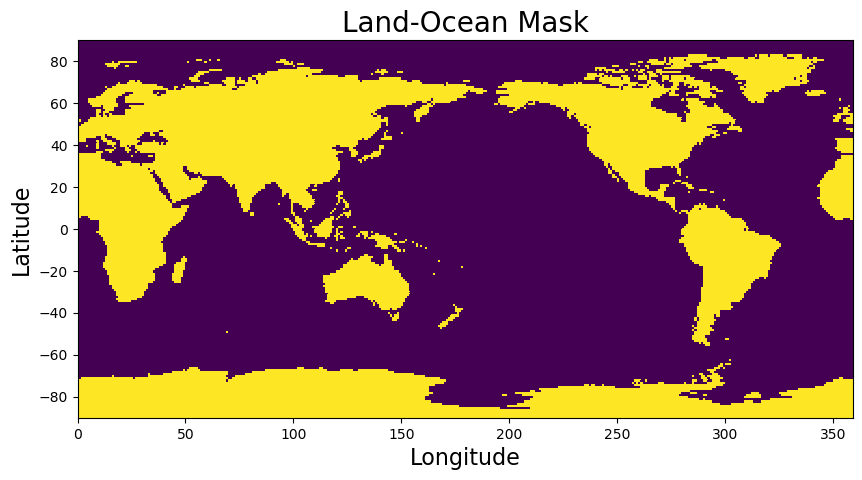

In [12]:
fig, ax = plt.subplots(figsize=(10, 5), dpi=100)
heatmap = ax.pcolormesh(lon, lat, mask)
ax.set_title('Land-Ocean Mask', size=20)
ax.set_xlabel('Longitude', size=16)
ax.set_ylabel('Latitude', size=16)

Then add minimum temperature for each date iteratively  
After that, save to 365 files

In [15]:
os.makedirs('./processed_1.0', exist_ok=True)
for month in range(1, NUM_OF_MONTHS+1, 1):
    for day in range(1, NUM_OF_DAYS[month]+1, 1):
        date = '{:02d}{:02d}'.format(month, day)
        masked_tmp = np.ma.masked_where(mask==False, yearly_date_avg[date])
        pd.DataFrame(masked_tmp).to_csv('./processed_1.0/{}.csv'.format(date))

Also save lat and lon

In [18]:
pd.DataFrame(lat).to_csv('./processed_1.0/lat.csv')
pd.DataFrame(lon).to_csv('./processed_1.0/lon.csv')